# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



Checking for Missing Values

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.isnull().sum().any()

False

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

Data Visualisation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

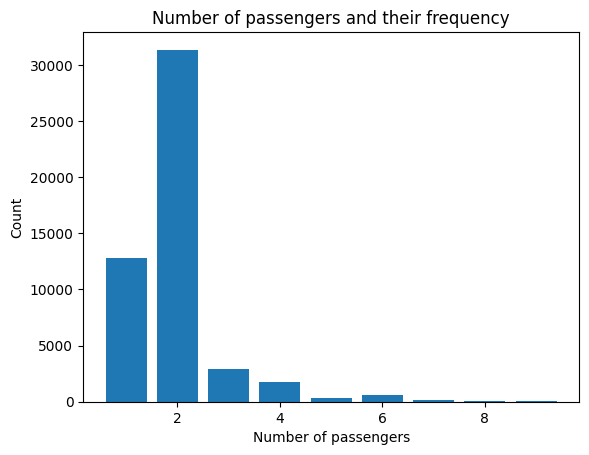

In [9]:
plt.bar(df['num_passengers'].unique(), df['num_passengers'].value_counts().sort_index())
plt.xlabel('Number of passengers')
plt.ylabel('Count')
plt.title('Number of passengers and their frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

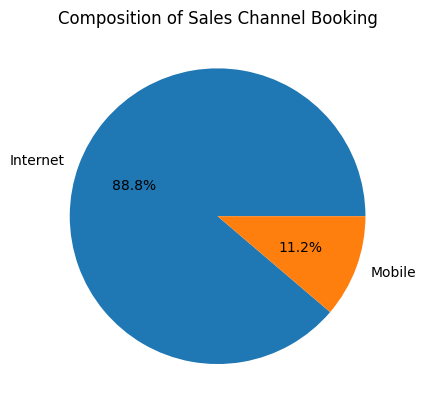

In [10]:
plt.pie(df['sales_channel'].value_counts(), labels = df['sales_channel'].value_counts().index, autopct='%1.1f%%')
plt.title('Composition of Sales Channel Booking')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

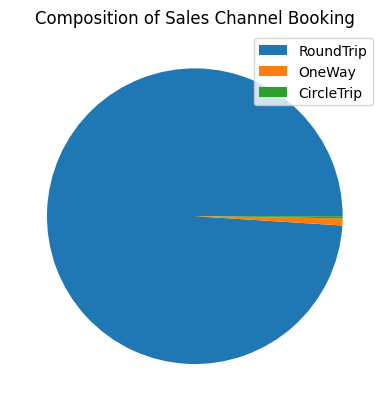

In [11]:
plt.pie(df['trip_type'].value_counts())
plt.title('Composition of Sales Channel Booking')
plt.legend(labels=df['trip_type'].value_counts().index, loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

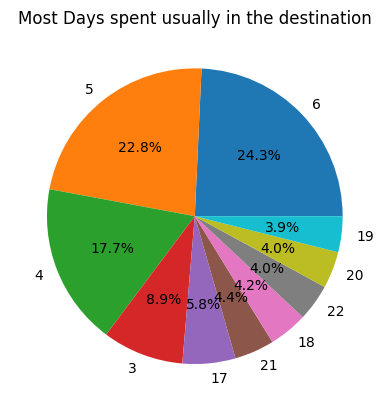

In [12]:
plt.pie(df['length_of_stay'].value_counts().head(10),labels = df['length_of_stay'].value_counts().head(10).index, autopct='%1.1f%%')
plt.title('Most Days spent usually in the destination')
plt.show

Text(0.5, 1.0, 'Flight Day Value Counts')

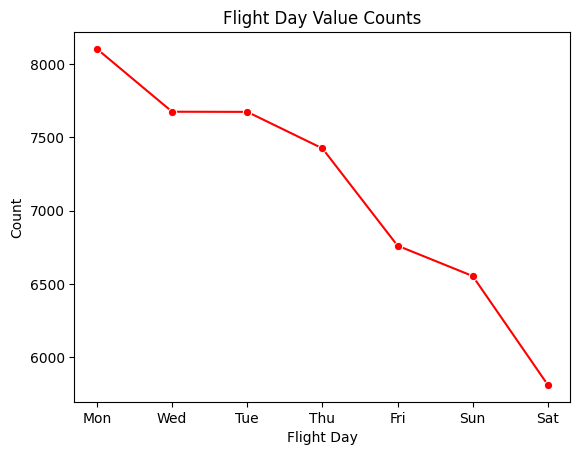

In [13]:
sns.lineplot(x=df['flight_day'].value_counts().index, y=df['flight_day'].value_counts(), marker='o', color='red')
plt.xlabel('Flight Day')
plt.ylabel('Count')
plt.title('Flight Day Value Counts')

Text(0.5, 1.0, 'Distribution of Number of Passengers by Booking Origin')

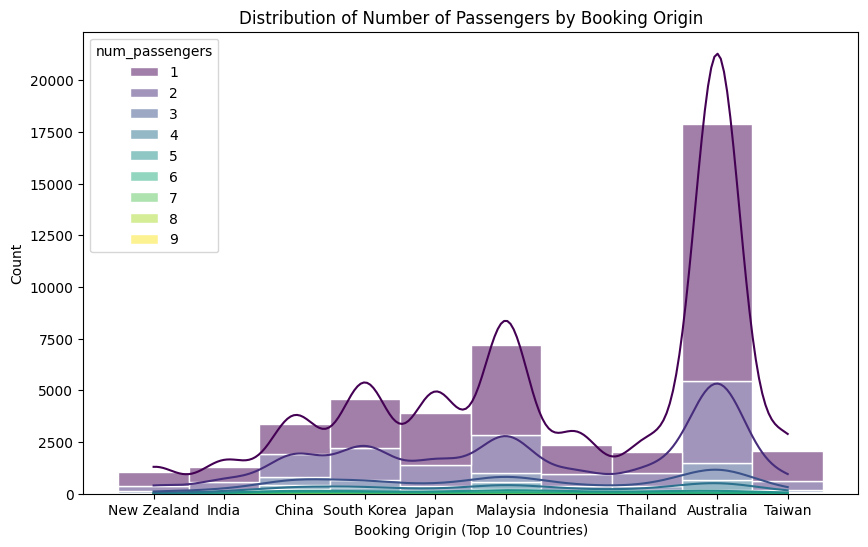

In [15]:
top_countries = df['booking_origin'].value_counts().head(10).index
top_countries_counts = df[df['booking_origin'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.histplot(data=top_countries_counts, x='booking_origin', hue='num_passengers', multiple='stack', palette='viridis', edgecolor='white', kde=True)
plt.xlabel('Booking Origin (Top 10 Countries)')
plt.ylabel('Count')
plt.title('Distribution of Number of Passengers by Booking Origin')

# Show the plot

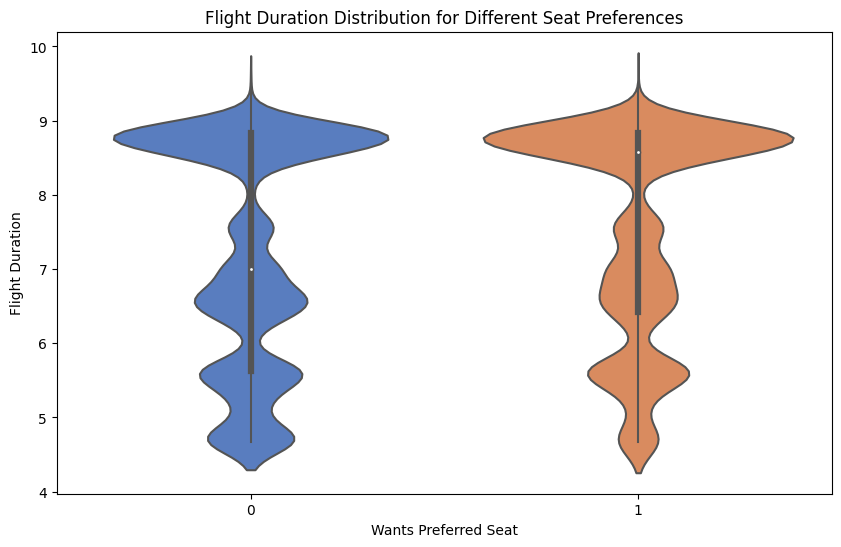

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='wants_preferred_seat', y='flight_duration', palette='muted')
plt.xlabel('Wants Preferred Seat')
plt.ylabel('Flight Duration')
plt.title('Flight Duration Distribution for Different Seat Preferences')
plt.show()

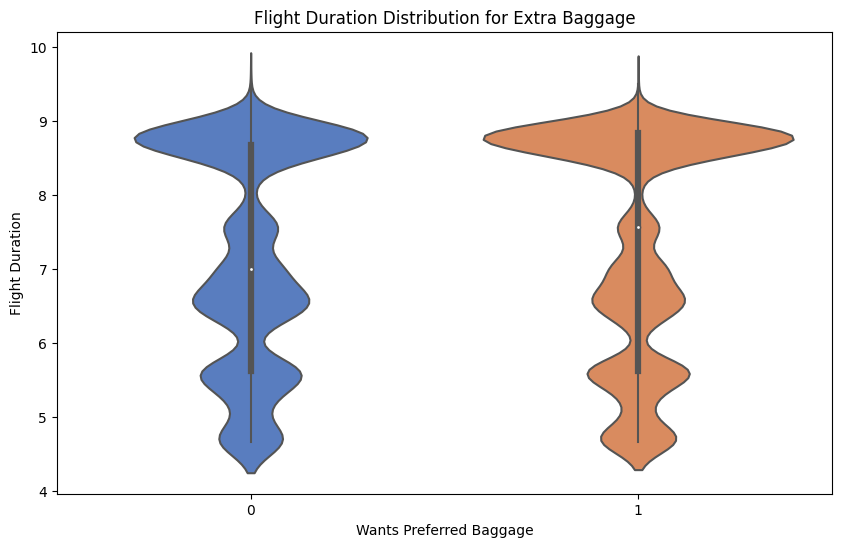

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='wants_extra_baggage', y='flight_duration', palette='muted')
plt.xlabel('Wants Preferred Baggage')
plt.ylabel('Flight Duration')
plt.title('Flight Duration Distribution for Extra Baggage')
plt.show()

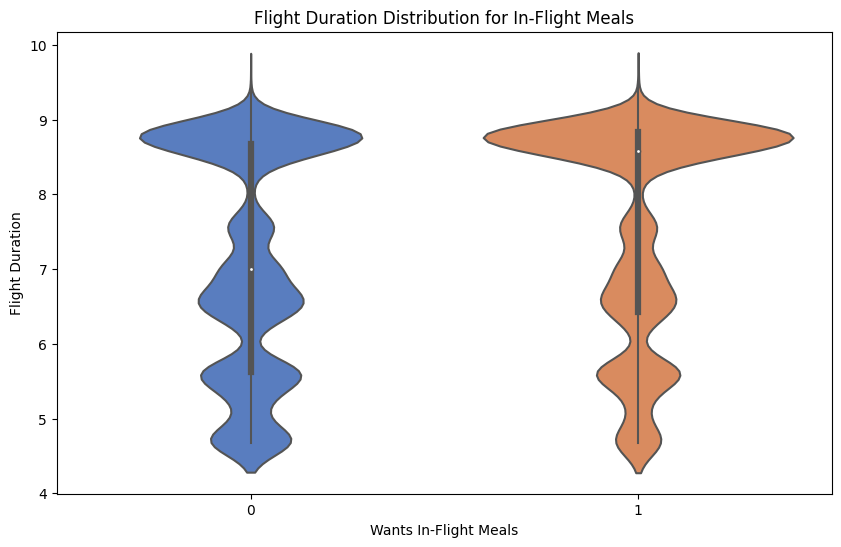

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='wants_in_flight_meals', y='flight_duration', palette='muted')
plt.xlabel('Wants In-Flight Meals')
plt.ylabel('Flight Duration')
plt.title('Flight Duration Distribution for In-Flight Meals')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

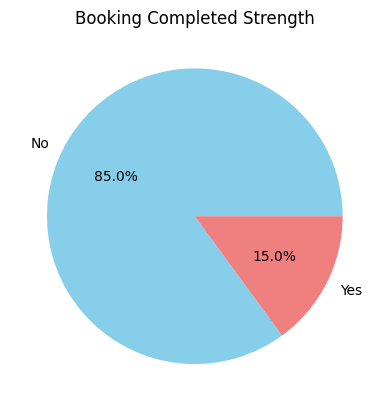

In [19]:
plt.pie(df['booking_complete'].value_counts(),labels = ['No','Yes'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Booking Completed Strength')
plt.show

Before we compute any statistics on the data, lets do any necessary data conversion

In [20]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [21]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)


In [22]:
df["flight_day"].unique()


array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [24]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Correlation Heatmap

C:\Users\PRANSSHU\AppData\Local\Temp\ipykernel_10504\3244441201.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

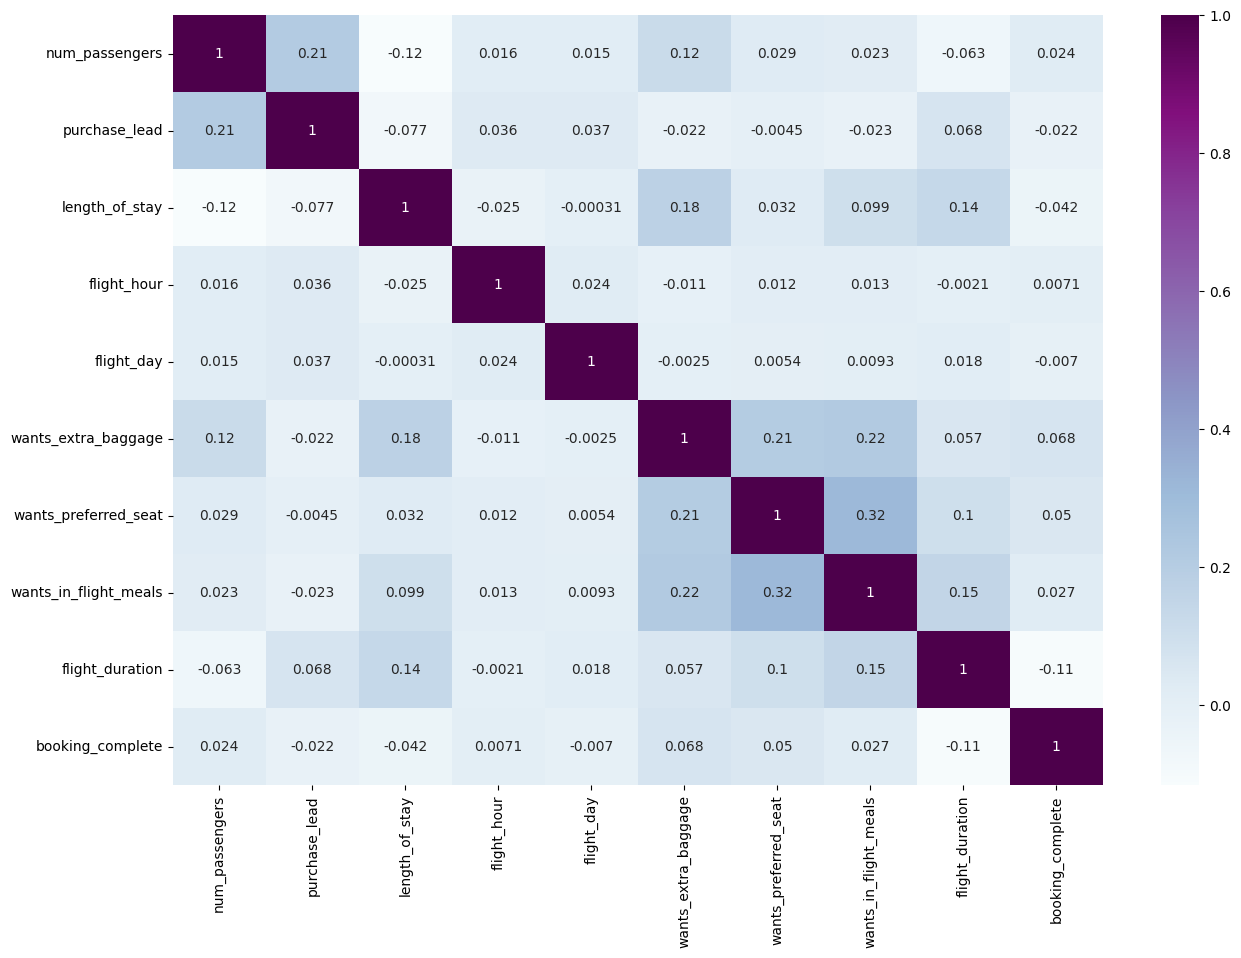

In [23]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

Encoding Data for Model Training

In [25]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in needed(string) column.
df["sales_channel"]= label_encoder.fit_transform(df["sales_channel"])
df["trip_type"]= label_encoder.fit_transform(df["trip_type"])
df["route"]= label_encoder.fit_transform(df["route"])
df["booking_origin"]= label_encoder.fit_transform(df["booking_origin"])


In [26]:
df["sales_channel"].value_counts()

0    44382
1     5618
Name: sales_channel, dtype: int64

In [27]:
df["trip_type"].value_counts()

2    49497
1      387
0      116
Name: trip_type, dtype: int64

In [28]:
df["booking_origin"].value_counts()

4     17872
51     7174
85     4559
43     3885
17     3387
      ...  
67        1
95        1
92        1
13        1
88        1
Name: booking_origin, Length: 104, dtype: int64

In [29]:
df["route"].value_counts()

6      2680
717     924
633     842
436     801
287     744
       ... 
589       1
236       1
259       1
572       1
672       1
Name: route, Length: 799, dtype: int64

Splitting Data for Model Training

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['booking_complete'], axis=1),
    df['booking_complete'],
    test_size=0.3,
    random_state=0)


Calculating Mutual Information Between Variables for Classification

In [31]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00053851, 0.00206792, 0.00685279, 0.00356851, 0.01184501,
       0.        , 0.00351524, 0.05340599, 0.04427551, 0.00743009,
       0.00166402, 0.        , 0.01799897])

In [32]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

route                    0.053406
booking_origin           0.044276
flight_duration          0.017999
length_of_stay           0.011845
wants_extra_baggage      0.007430
trip_type                0.006853
purchase_lead            0.003569
flight_day               0.003515
sales_channel            0.002068
wants_preferred_seat     0.001664
num_passengers           0.000539
flight_hour              0.000000
wants_in_flight_meals    0.000000
dtype: float64

<Axes: >

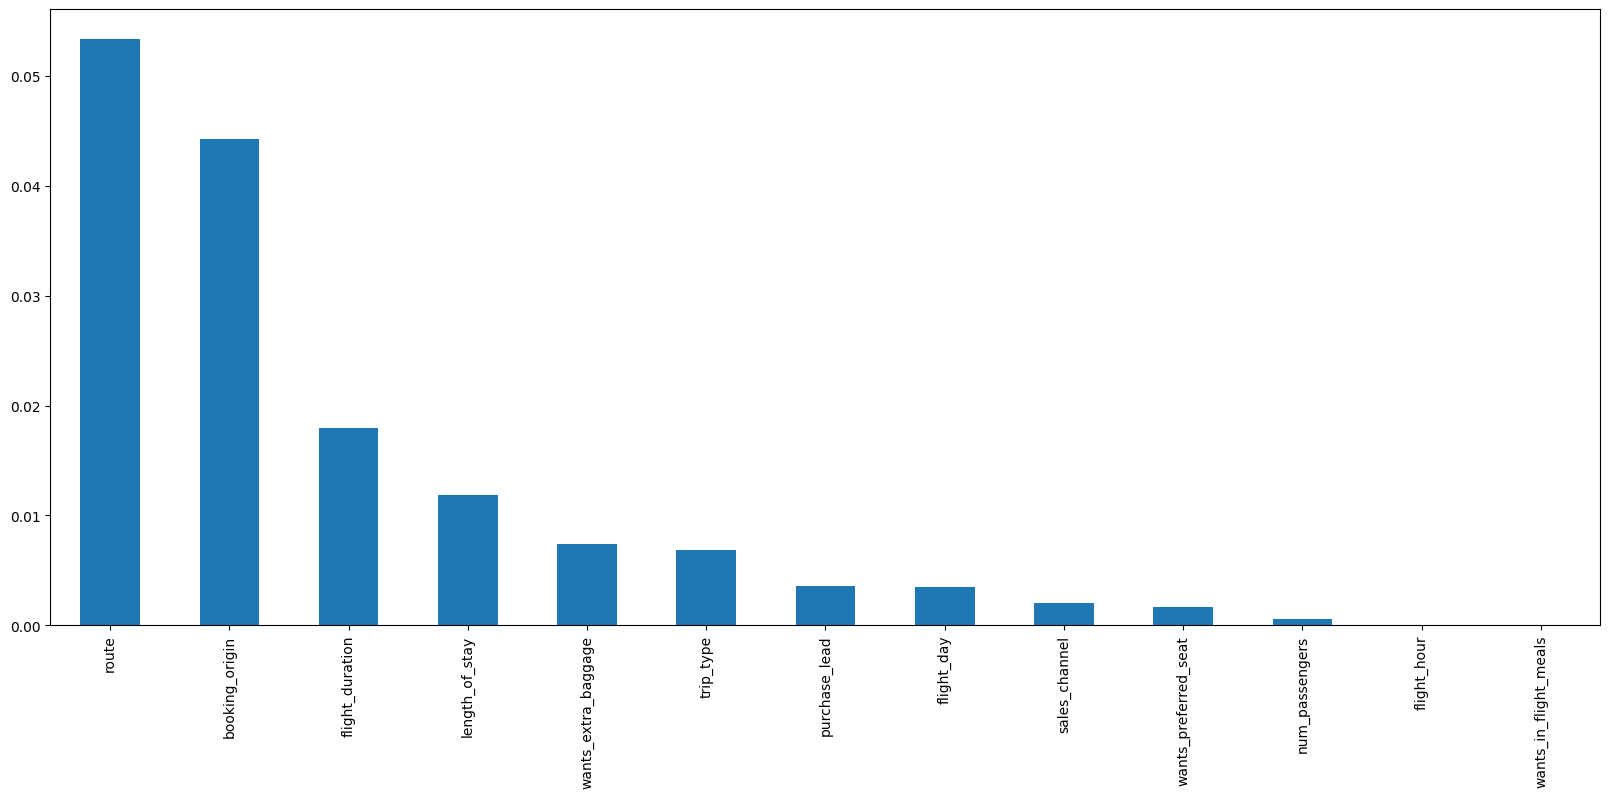

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Training Model using Random Forrest Classifier

In [34]:
# importing random forest classifier from sklearn libraries
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

Evaluating Metrics for Accuracy of Model Prediction

In [35]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8496


Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12513,   209],
       [ 2047,   231]], dtype=int64)

<Axes: >

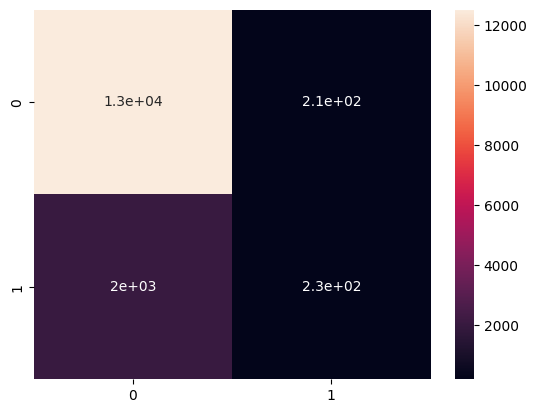

In [38]:
sns.heatmap(cm, annot=True)

AUC Score for the Accuracy of Model Performace

In [40]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC score

auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc_score)


AUC Score: 0.5424882532232813
